In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./assets/road_traffic.csv',encoding='utf8')
df.head()

/var/folders/cb/97h05k115pq99d_0k1h0h0yh0000gn/T/ipykernel_27778/4070489146.py:1: DtypeWarning: Columns (0,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./assets/road_traffic.csv',encoding='utf8')


,ind_id,ind_definition,reportyear,geotype,geotypevalue,geoname,county_name,county_fips,region_name,region_code,...,avmttotal,avmtrate,LL95CI_avmtrate,UL95CI_avmtrate,avmtrate_se,avmtrate_rse,CA_decile_avmt,CA_RR_avmtrate,groupquarters,version
0,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17Dec2013 13:55:31
1,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17Dec2013 13:55:31
2,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17Dec2013 13:55:31
3,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17Dec2013 13:55:31
4,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17Dec2013 13:55:31


In [88]:
df.columns

Index(['ind_id', 'ind_definition', 'reportyear', 'geotype', 'geotypevalue',
       'geoname', 'county_name', 'county_fips', 'region_name', 'region_code',
       'mode', 'severity', 'injuries', 'totalpop', 'poprate', 'LL95CI_poprate',
       'UL95CI_poprate', 'poprate_se', 'poprate_rse', 'CA_decile_pop',
       'CA_RR_poprate', 'avmttotal', 'avmtrate', 'LL95CI_avmtrate',
       'UL95CI_avmtrate', 'avmtrate_se', 'avmtrate_rse', 'CA_decile_avmt',
       'CA_RR_avmtrate', 'groupquarters', 'version'],
      dtype='object')

In [89]:
df = df[['reportyear','geotype','geoname','county_name','region_name','mode','severity','injuries']]
county_df = df[df['geotype'] == 'CO']

In [90]:
filter_reportyear =['2006-2010', '2005-2007', '2002-2004', '2008-2010']
county_df = county_df[~county_df['reportyear'].isin(filter_reportyear) ]
county_df.head()

,reportyear,geotype,geoname,county_name,region_name,mode,severity,injuries
0,2002,CO,Orange,Orange,Southern California,All modes,Killed,193.0
1,2002,CO,Orange,Orange,Southern California,All modes,Severe Injury,721.0
2,2002,CO,Orange,Orange,Southern California,Bicyclist,Killed,7.0
3,2002,CO,Orange,Orange,Southern California,Bicyclist,Severe Injury,49.0
4,2002,CO,Orange,Orange,Southern California,Bus,Severe Injury,1.0


In [91]:
county_df = county_df[county_df['mode'] != 'All modes']
# county_df = county_df[county_df['reportyear'] == '2002']

In [100]:
df_2002 = county_df[county_df['reportyear'] == '2002']

<Axes: xlabel='mode', ylabel='count'>

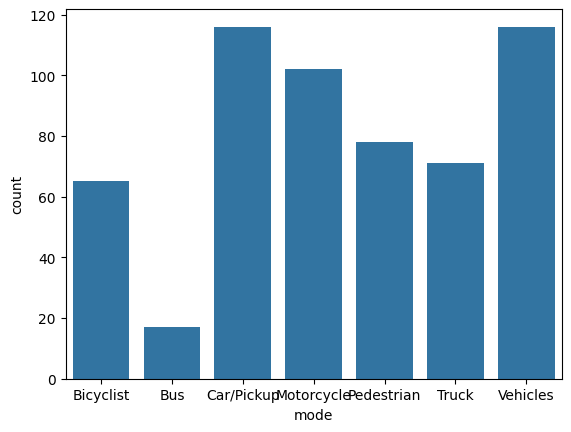

In [101]:
sns.countplot(data = df_2002, x = 'mode')

<Axes: xlabel='mode', ylabel='injuries'>

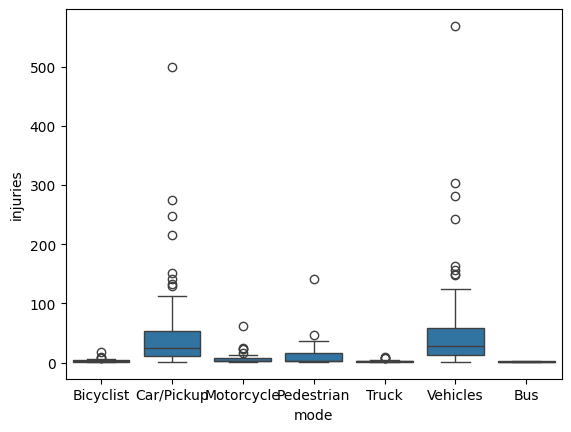

In [105]:
severity_df = df_2002[df_2002['severity'] == 'Killed']
sns.boxplot(data = severity_df, x='mode', y='injuries')
# sns.swarmplot(data = severity_df, x='mode', y='injuries')

In [ ]:
df_pivoted = county_df.pivot_table(
    index=['reportyear', 'geotype', 'geoname', 'county_name', 'region_name', 'mode'],
    columns='severity',
    values='injuries',
    aggfunc='sum'
).reset_index()

df_pivoted = df_pivoted.rename(columns={
    'Killed': 'killed_injuries',
    'Severe Injury': 'severe_injuries'
})

df_pivoted

severity,reportyear,geotype,geoname,county_name,region_name,mode,killed_injuries,severe_injuries
0,2002,CO,Alameda,Alameda,Bay Area,Bicyclist,3.0,34.0
1,2002,CO,Alameda,Alameda,Bay Area,Car/Pickup,79.0,332.0
2,2002,CO,Alameda,Alameda,Bay Area,Motorcycle,10.0,61.0
3,2002,CO,Alameda,Alameda,Bay Area,Pedestrian,20.0,60.0
4,2002,CO,Alameda,Alameda,Bay Area,Truck,NaN,5.0
...,...,...,...,...,...,...,...,...
2932,2010,CO,Yuba,Yuba,Sacramento Area,Car/Pickup,7.0,18.0
2933,2010,CO,Yuba,Yuba,Sacramento Area,Motorcycle,3.0,9.0
2934,2010,CO,Yuba,Yuba,Sacramento Area,Pedestrian,2.0,4.0
2935,2010,CO,Yuba,Yuba,Sacramento Area,Truck,1.0,1.0


<Axes: xlabel='reportyear', ylabel='killed_injuries'>

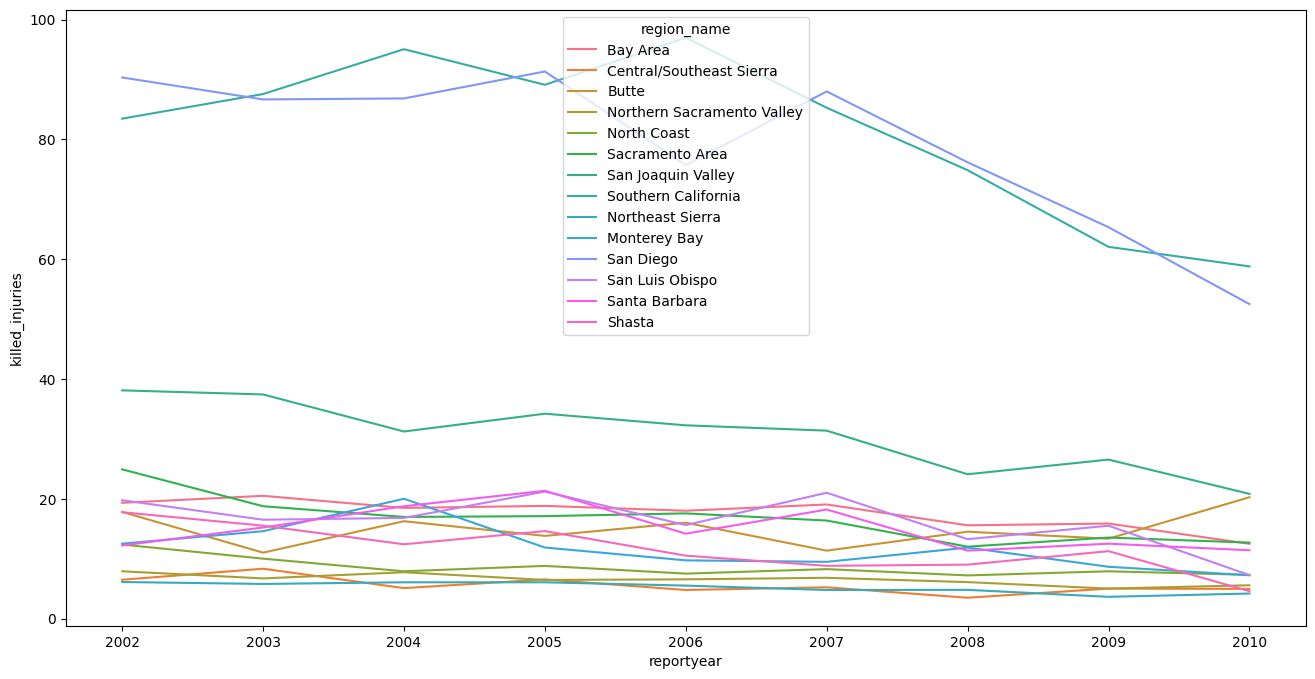

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))
sns.lineplot(ax=ax, data=df_pivoted,x='reportyear', y='killed_injuries', hue='region_name',errorbar=None)